In [ ]:
!ls

data	       __init__.py  README.md	      Untitled.ipynb
deconvolution  notebooks    requirements.txt


In [5]:
import sys
sys.path.append("/home/vs_theg/ST_program/cell_program_deconvolution/")  # 添加上级目录到Python路径
import numpy as np
import torch
from deconvolution.model import DeconvModel
from deconvolution.graph_utils import build_laplacian
from deconvolution.train import train_model
from deconvolution.visualize import plot_spatial, plot_program_contribution

Matplotlib is building the font cache; this may take a moment.


In [ ]:
# Step 1: Load data
data = np.load("./data/structured_inputs.npz")
Y = torch.tensor(data["Y"], dtype=torch.float32)         # (P, S)
X = torch.tensor(data["X"], dtype=torch.float32)         # (S, T)
coords = data["coords"]                                  # (S, 2)
# 查看数据前几行
print("Y (shape: {}):".format(Y.shape))
print(Y[:5, :5])  # 查看前5行前5列
print("\nX (shape: {}):".format(X.shape))
print(X[:5, :5])  # 查看前5行前5列
print("\ncoords (shape: {}):".format(coords.shape))
print(coords[:5])  # 查看前5行

Y (shape: torch.Size([5, 100])):
tensor([[ 1.8409,  1.9083,  1.9746,  1.9651,  2.2497],
        [ 1.2243,  1.4916,  1.4148,  1.2982,  1.4451],
        [ 0.4873,  0.2651,  0.0682,  0.2224,  0.1512],
        [ 0.2893,  0.1798,  0.0273,  0.3019,  0.2047],
        [-0.0426,  0.2145, -0.0025,  0.2796,  0.0686]])

X (shape: torch.Size([100, 4])):
tensor([[9.1032e-01, 8.2394e-02, 6.5080e-10, 7.2867e-03],
        [9.7351e-01, 1.9764e-02, 6.2459e-03, 4.7715e-04],
        [9.9617e-01, 3.8197e-03, 8.9385e-06, 1.1714e-07],
        [8.9285e-01, 1.4052e-07, 1.0715e-01, 6.4038e-18],
        [9.9851e-01, 3.3023e-07, 4.0758e-06, 1.4858e-03]])

coords (shape: (100, 2)):
[[32.48357077 29.30867849]
 [33.23844269 37.61514928]
 [28.82923313 28.82931522]
 [37.89606408 33.83717365]
 [27.65262807 32.71280022]]


In [ ]:
P, S = Y.shape
S_, T = X.shape
assert S == S_

L = build_laplacian(coords, k=6)
model = DeconvModel(T=T, P=P, S=S, X_tensor=X, L=L)

Epoch 0, Loss=0.8651, Recon=0.6434
Epoch 100, Loss=0.7312, Recon=0.5220
Epoch 200, Loss=0.6217, Recon=0.4240
Epoch 300, Loss=0.5316, Recon=0.3446
Epoch 400, Loss=0.4572, Recon=0.2803
Epoch 500, Loss=0.3953, Recon=0.2279
Epoch 600, Loss=0.3435, Recon=0.1852
Epoch 700, Loss=0.2998, Recon=0.1503
Epoch 800, Loss=0.2628, Recon=0.1219
Epoch 900, Loss=0.2311, Recon=0.0986


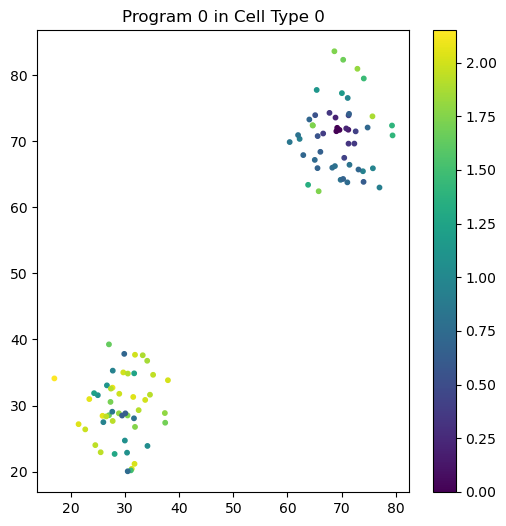

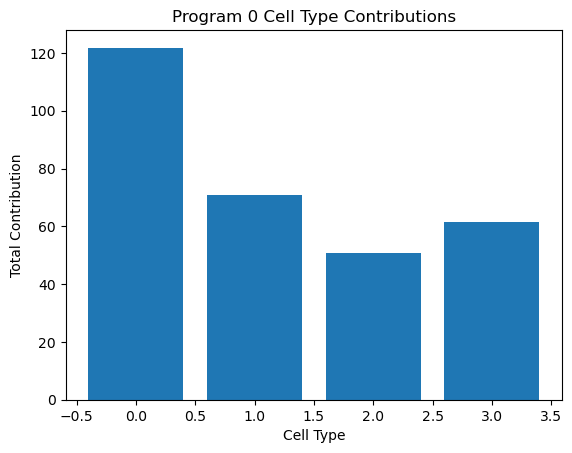

In [ ]:
# Step 2: Train model
train_model(model, Y_obs=Y, num_epochs=1000, lambda1=1e-4, lambda2=1e-4)

# Step 3: Visualize results
Y_tps = model.Y_tps.detach()
plot_spatial(Y_tps, coords, cell_type=0, program_index=0)
plot_program_contribution(Y_tps, program_index=0)